In [1]:
import cvxpy as cp
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import cvxpy as cp
import matplotlib.pyplot as plt
import numpy as np
import pdb


rng = np.random.default_rng(42)
n = 64
m = int(3 * n)

# data
x0 = rng.random(n) + 1j * rng.random(n)
A = rng.random((m, n)) + 1j * rng.random((m, n))
x0_real, x0_imag = np.real(x0), np.imag(x0)
A_real, A_imag = np.real(A), np.imag(A)
y = np.abs(A @ x0)
B = np.hstack([A_real, -A_imag])
C = np.hstack([A_imag, A_real])

(CVXPY) Nov 20 04:57:21 PM: Your problem has 128 variables, 0 constraints, and 0 parameters.
(CVXPY) Nov 20 04:57:21 PM: It is compliant with the following grammars: 
(CVXPY) Nov 20 04:57:21 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Nov 20 04:57:21 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Nov 20 04:57:21 PM: Your problem is compiled with the CPP canonicalization backend.


                                     CVXPY                                     
                             v1.7.0.dev0+0.5870139                             

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.11.9, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:    49536
Number of nonzeros in inequality constraint Jacobian.:     1152
Number of nonzeros in Lagrangian Hessian.............:      384

Total number of variables............................:      704
                     variables with only lower bound

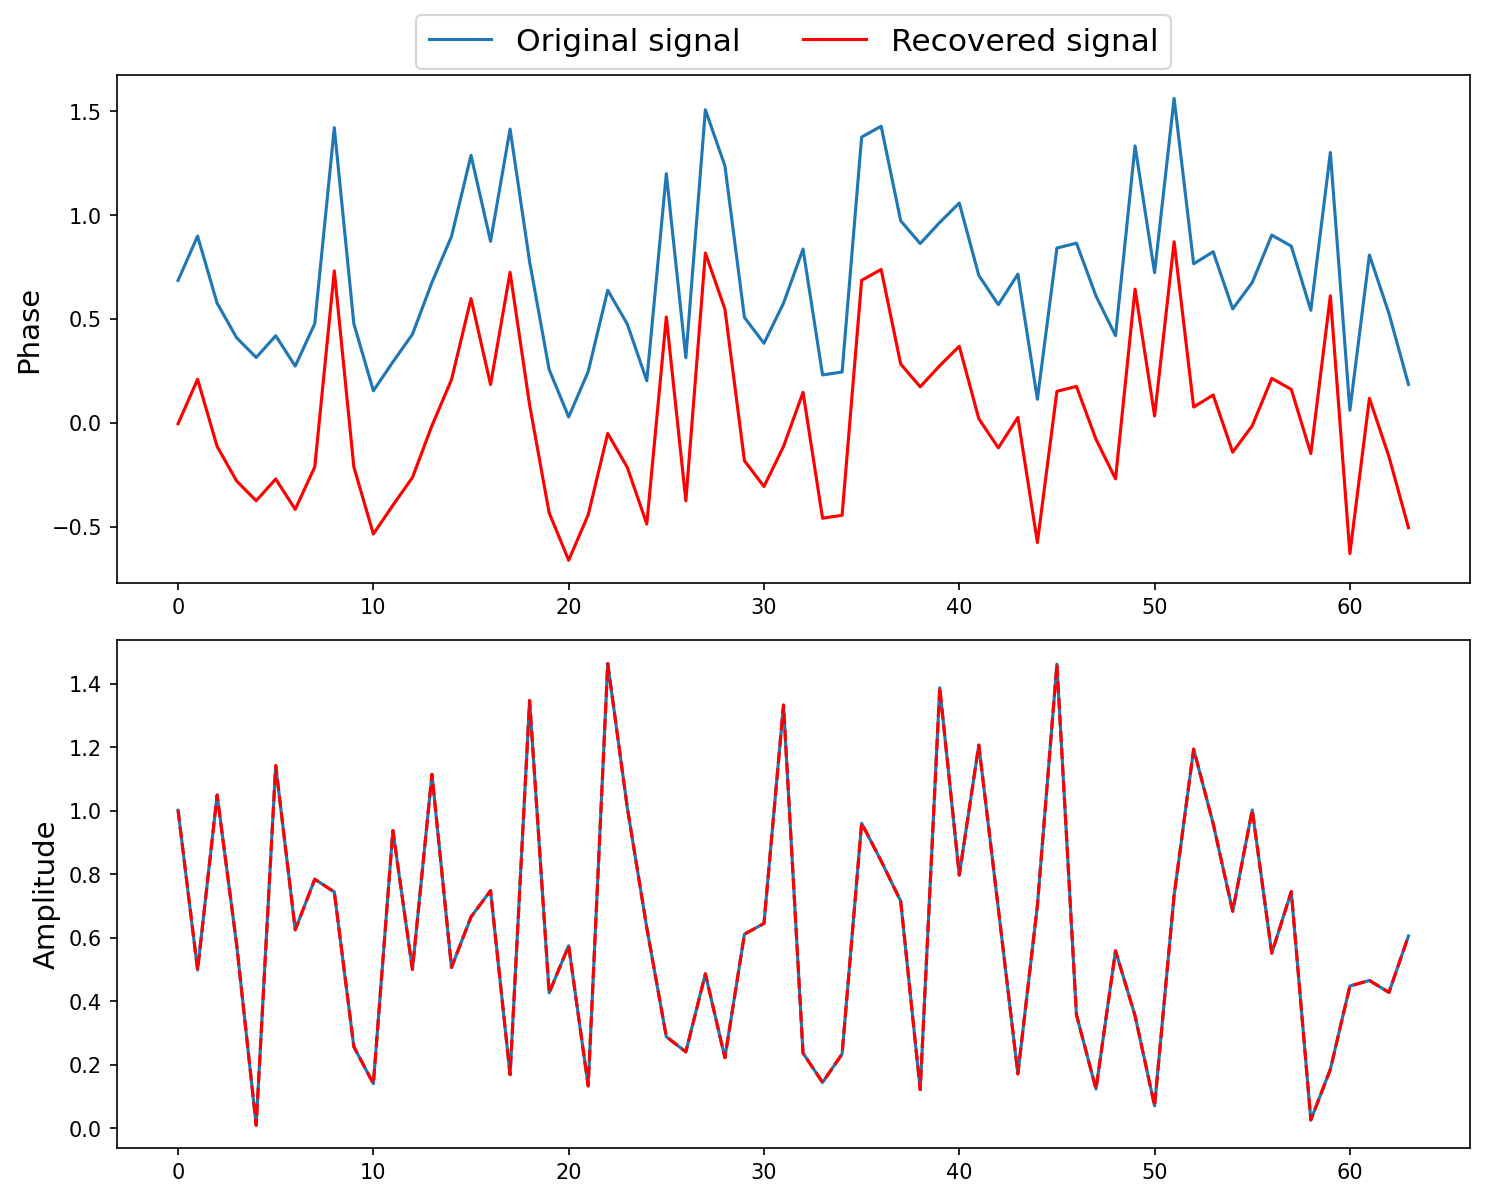

In [3]:
x_tilde = cp.Variable(2 * n)
#cost = cp.norm2(cp.square(B @ x_tilde) + cp.square(C @ x_tilde) - cp.square(y))
cost = cp.norm1((B @ x_tilde) ** 2 + (C @ x_tilde) ** 2 - y ** 2)
#cost = cp.sum(cp.square(cp.square(B @ x_tilde) + cp.square(C @ x_tilde) - cp.square(y)))

# solve the problem
prob = cp.Problem(cp.Minimize(cost))
result = prob.solve(solver=cp.IPOPT, verbose=True, nlp=True, derivative_test='none', 
                    least_square_init_duals='no')

x = np.vstack([x_tilde.value[:n].T, x_tilde.value[n:].T])
fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(10, 8), dpi=150)
tan = np.array(x[1, :] / x[0, :])
angle = np.arctan(tan)
tan0 = x0_imag / x0_real
angle0 = np.arctan(tan0)
ax0.plot(angle0)
ax0.plot(angle, "r")
ax1.plot(np.array(np.power(x0_real, 2) + np.power(x0_imag, 2)))
ax1.plot(np.array(np.power(x[0, :], 2) + np.power(x[1, :], 2)), "r--")
ax0.set_ylabel("Phase", fontsize=14)
ax1.set_ylabel("Amplitude", fontsize=14)

# add legend above first figure
ax0.legend(["Original signal", "Recovered signal"], loc='upper center', bbox_to_anchor=(0.5, 1.15),
            ncol=2, fontsize=15)

plt.tight_layout()
plt.savefig("phase_retrieval.pdf")